### **1. Importing Libraries**

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# setting up Matplotlib to draw more beautiful graphs
%matplotlib inline 

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# 실행할 때 마다 동일한 결과가 나오도록 무작위 함수들의 시드(seed)를 지정한다.
# 참고: 실습용 데이터에 무작위로 생성된 데이터를 더해 훈련 효과를 높이는 경우가 많다. 따라서 동일한 코드를 반복 실행할 때 동일한 결과를 생성하도록 무작위성의 시드를 지정한다. 사용되는 시드번호는 중요하지 않다.
np.random.seed(42)

### **2. Problem Understanding**

- Predicing life satisfaction and happiness of people by GDP


### **3. Data Understanding**

- oecd_bli_2015.csv: 2015년도 기준 OECD 국가들의 '더 나은 삶의 지수'(BLI) 데이터
- gdp_per_capita.csv: IMF(국제통화기금)에 제공하는 1인당 국내총생산 데이터(GDP) 데이터

### **4. Data Preparation**

In [4]:
# 4-1 Data Loading
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml2/master/notebooks/datasets/lifesat/"


In [5]:
# not working due to company vpn
# gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', encoding='latin1', na_values="n/a")

- thousands=',': 1000단위로 쉼표 찍기
- delimiter='\t': 탭(tab)으로 열 구분
- encoding='latin1': 인코딩 방식 지정. 파일에서 사용된 'Côte d'Ivoire'(코트디브와르)와 같은 특수 알파벳을 사용하는 국가명 처리용
- na_values="n/a": 결측치를 'NaN'으로 처리.

In [6]:
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', na_values="n/a")

In [7]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0
...,...,...,...,...,...,...,...
184,Venezuela,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",7744.750,2010.0
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.340,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.150,2010.0


In [8]:
# 국가명을 행 인덱스로 지정
gdp_per_capita.set_index("Country", inplace=True)

# 2015 행을 GDP per capita로 변경
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) 

In [9]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


In [10]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')

In [11]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [12]:
oecd_bli.shape

(3292, 17)

In [14]:
# 국가별 삶의 만족도는 'Life satisfaction'이라는 측정지표('Indicator') 열(column)의 특성값 중에 하나이다. 총 24개 측정지표가 사용되며 그중에 하나임을 확인할 수 있다.
oecd_bli.Indicator.unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [15]:
'Life satisfaction' in oecd_bli.Indicator.unique()

True

In [17]:
# 그런데 삶의 만족도와 관련된 행이 OECD 회원국의 수인 37보다 많다. 이는 삶의 만족도와 관련해서 데이터의 중복이 있다는 것을 의미한다.
mask = oecd_bli.Indicator == 'Life satisfaction'
oecd_bli[mask].shape

(179, 17)

In [18]:
oecd_bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [23]:
arr1 = oecd_bli.INEQUALITY.unique()

sum = 0
for ineq in arr1:
    num_lines = (oecd_bli['INEQUALITY'] == ineq).sum()
    sum += num_lines
    print(f"{ineq:>3}:\t{num_lines}행")

print(f"\n 총:\t{sum}행")

TOT:	888행
 MN:	881행
WMN:	881행
HGH:	328행
 LW:	314행

 총:	3292행


In [24]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

In [25]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In [26]:
oecd_bli.loc['Korea']

Indicator
Air pollution                                   30.00
Assault rate                                     2.10
Consultation on rule-making                     10.40
Dwellings without basic facilities               4.20
Educational attainment                          82.00
Employees working very long hours               18.72
Employment rate                                 64.00
Homicide rate                                    1.10
Household net adjusted disposable income     19510.00
Household net financial wealth               29091.00
Housing expenditure                             16.00
Job security                                     3.20
Life expectancy                                 81.30
Life satisfaction                                5.80
Long-term unemployment rate                      0.01
Personal earnings                            36354.00
Quality of support network                      72.00
Rooms per person                                 1.40
Self-reported heal

앞서 살펴본 대로 1인당 GDP 데이터는 OECD 회원국 이상의 국가 데이터가 포함되어 있다. OECD 회원국으로 제한해서 1인당 GDP와 삶의 만족도 사이의 관계를 파악하기 위해 여기서는 앞서 구한 두 개의 데이터프레임을 하나로 병합하는 방식을 이용한다. 더 나은 삶의 지수에서는 삶의 만족도를, GDP 데이터에서는 1인당 GDP 열만 이용하며 국가명을 기준으로 하면 자연스럽게 OECD 회원국에 해당하는 행만 추출된다.

참고: OECD 회원국들만 대상으로 하기 위해 left_index=True와 right_index=True로 설정한다.

In [27]:
# merging 2 tables
oecd_country_stats = pd.merge(left=gdp_per_capita['GDP per capita'],
                              right=oecd_bli['Life satisfaction'], 
                              left_index=True, right_index=True)

1인당 GDP와 삶의 만족도 사이의 선형 관계를 확인하기 위해 국가를 
1인당 GDP 기준 오름차순으로 정렬시킨다.

In [28]:
oecd_country_stats.sort_values(by="GDP per capita", inplace=True)

oecd_country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8670.00,7.0
Mexico,9009.28,6.7
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Chile,13340.91,6.7
Slovak Republic,15991.74,6.1
Czech Republic,17256.92,6.5


아래 코드는 이어서 다룰 선형회귀 모델의 적합도를 설명하기 위해 
고의로 7개 국가의 데이터를 데이터셋에서 제외시킨다. 

In [30]:
# data split by Index (Country)
remove_indices = [0, 1, 6, 8, 33, 34, 35]

keep_indices = list(set(range(36)) - set(remove_indices))

In [31]:
missing_data = oecd_country_stats.iloc[remove_indices]

missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8670.00,7.0
Mexico,9009.28,6.7
Chile,13340.91,6.7
Czech Republic,17256.92,6.5
Norway,74822.11,7.4
Switzerland,80675.31,7.5
Luxembourg,101994.09,6.9


In [33]:
sample_data = oecd_country_stats.iloc[keep_indices] 

sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Slovak Republic,15991.74,6.1
Estonia,17288.08,5.6
Greece,18064.29,4.8
Portugal,19121.59,5.1
Slovenia,20732.48,5.7


### **5. EDA**

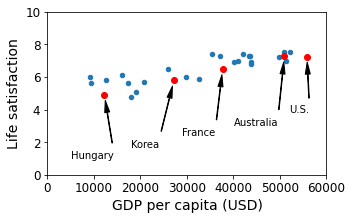

In [37]:
# 7개 국가를 제외한 국가들의 데이터 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# 언급된 5개 국가명 명기 좌표
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

# 5개 국가는 좌표를 이용하여 빨강색 점으로 표기
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    
    # 5개 국가명 표기
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    # 5개 국가 산점도 그리기
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel("GDP per capita (USD)")

plt.show()